# Sample 15arc-sec GEBCO_2023.nc on OM4p25 grid

## Apply edits to the topography.

## Region 15: 0,30,-100,-50,

In [1]:
# Notebook editor: John Krasting

# This notebook originated from Stephen Griffies, with many other contributors:
# Stephen.Griffies
# Alistair.Adcroft
# Robert.Hallberg
# Niki.Zadeh
# Raphael.Dussin

In [2]:
Region_Boundaries = [0,30,-100,-50]
Region_Name = "15: East Pacific and South/Central Caribbean"

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import netCDF4
import xarray as xr
import cmocean
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import sys
sys.path.insert(1, './tools/')
from topo_tools import *

Resolution = 240 cells/degree
GEBCO loaded with (nj,ni) =  (43200, 86400)  min(lon) =  -300.0  max(lon) =  60.0


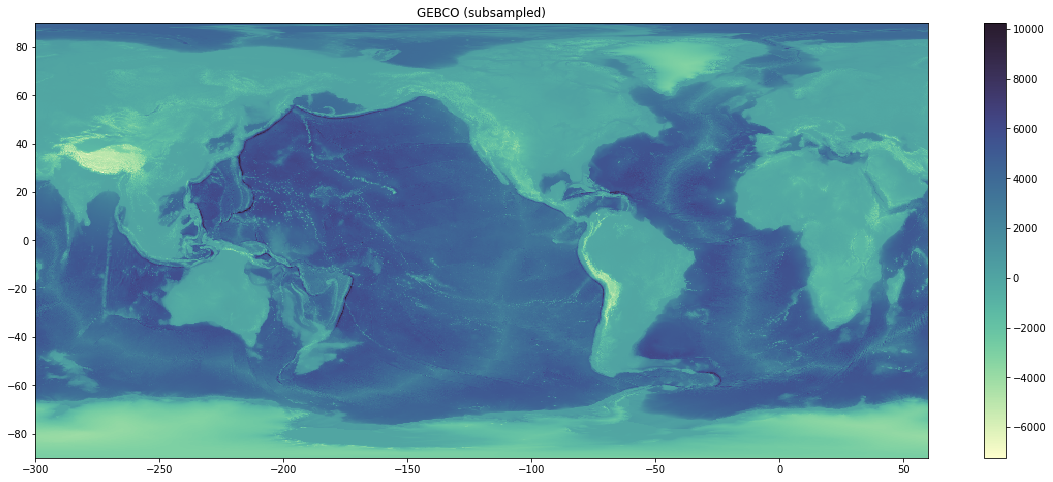

In [4]:
# GEBCO-2020 + Bedmachine combined topography 

fname_gebco  = "/archive/gold/datasets/topography/GEBCO_2023/GEBCO_2023.nc"

GEBCO = GEBCO_data(fname_gebco)

plt.figure(figsize=(20,8))
plt.pcolormesh(GEBCO.lonq[::100], GEBCO.latq[::100], GEBCO.depth[::100,::100], cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('GEBCO (subsampled)');

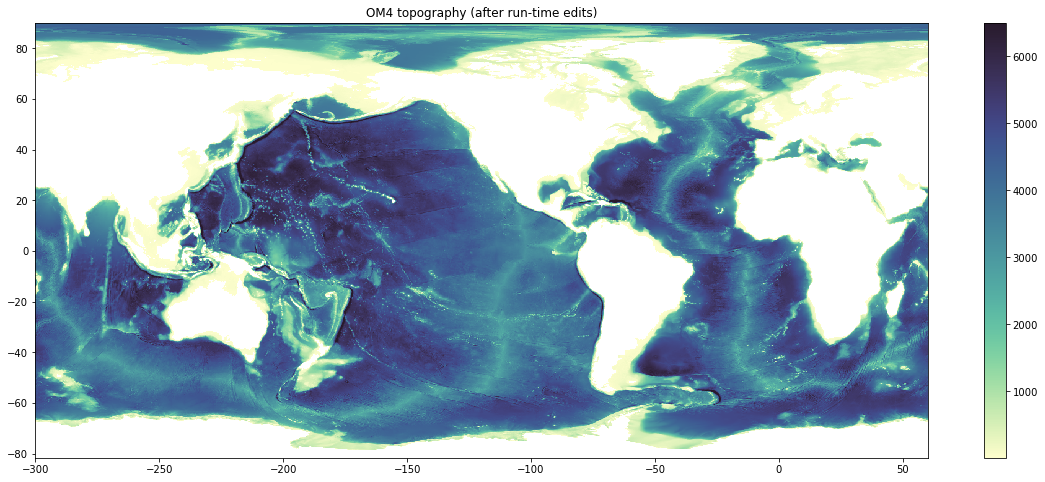

In [5]:
OM4 = OM4_data('/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_hgrid.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_static.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_mask.nc')
plt.figure(figsize=(20,8))
plt.pcolormesh(OM4.lonq, OM4.latq, OM4.depth, cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('OM4 topography (after run-time edits)');

OM5 longitudes are inconsistent!
OM5 latitudes are inconsistent!


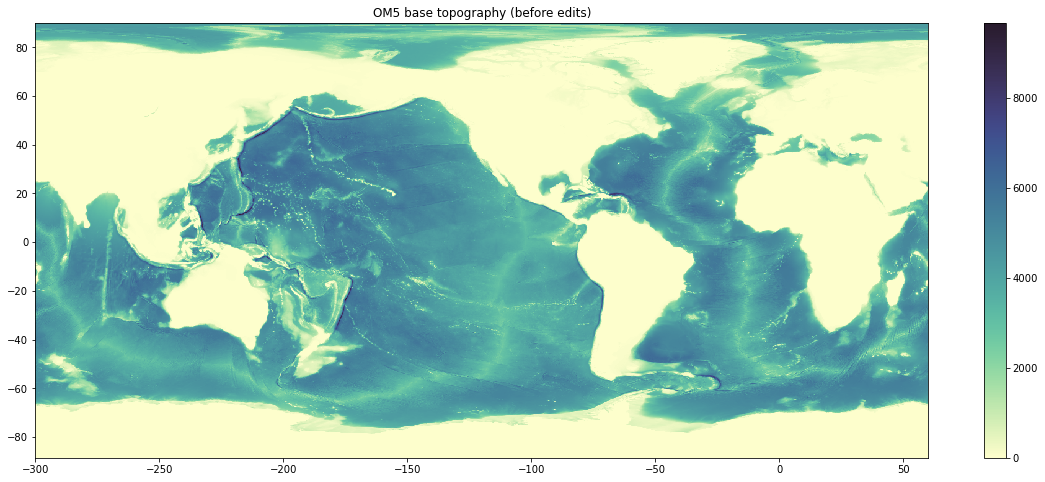

In [6]:
OM5 = OM5_data('/archive/jpk/OM5/OM5_025/prototypes/v20231109/tile_files/ocean_hgrid.nc',
               '/archive/jpk/OM5/OM5_025/prototypes/v20231109/tile_files/ocean_topog_merged.nc')

plt.figure(figsize=(20,8))
plt.pcolormesh(OM5.lonq, OM5.latq, OM5.depth, cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('OM5 base topography (before edits)');

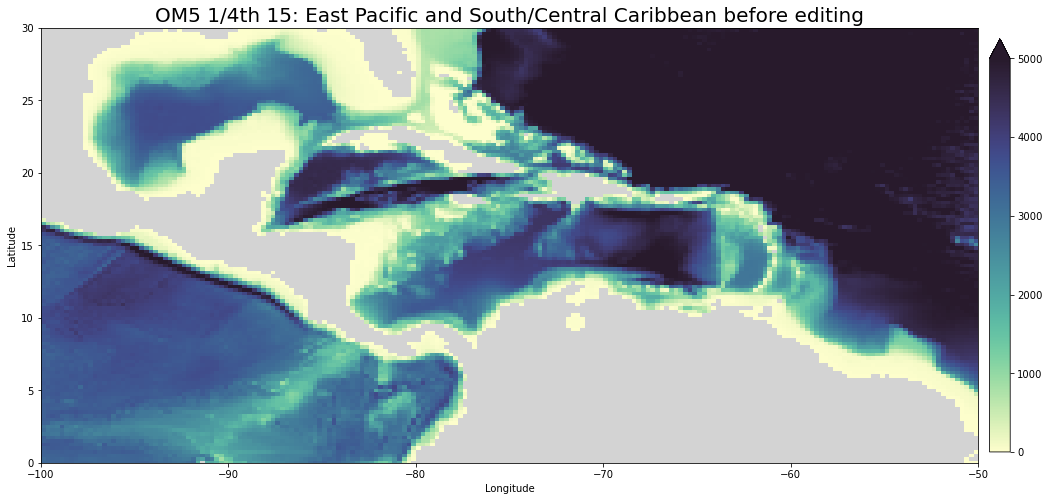

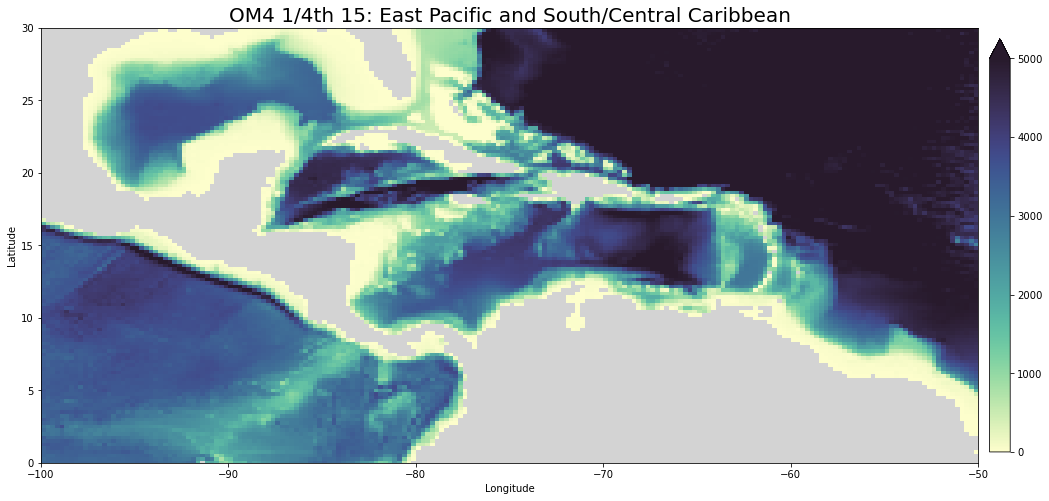

In [7]:
# Broad view of region before edits 

broadview(OM4,OM5,
          (Region_Boundaries[2],Region_Boundaries[3]),
          (Region_Boundaries[0],Region_Boundaries[1]),
          0, 5000, Region_Name, om4=True, new=False)

(-93.8, 12.5)
Gebco (js:je,is:ie) = 21599:23999,47987:50987
OM4 model (js:je,is:ie) = 502:544,798:850
OM5 model (js:je,is:ie) = 583:625,798:850
Using xlim = (-100.05, -87.55) ylim = (0.0, 10.0)
(-93.8, 12.5)
Gebco (js:je,is:ie) = 23999:26399,47987:50987
OM4 model (js:je,is:ie) = 542:586,798:850
OM5 model (js:je,is:ie) = 623:667,798:850
Using xlim = (-100.05, -87.55) ylim = (10.0, 20.0)
(-93.8, 12.5)
Gebco (js:je,is:ie) = 26399:28799,47987:50987
OM4 model (js:je,is:ie) = 584:630,798:850
OM5 model (js:je,is:ie) = 665:711,798:850
Using xlim = (-100.05, -87.55) ylim = (20.0, 30.0)
(-81.2, 12.5)
Gebco (js:je,is:ie) = 21599:23999,51011:54011
OM4 model (js:je,is:ie) = 502:544,849:901
OM5 model (js:je,is:ie) = 583:625,849:901
Using xlim = (-87.45, -74.95) ylim = (0.0, 10.0)
(-81.2, 12.5)
Gebco (js:je,is:ie) = 23999:26399,51011:54011
OM4 model (js:je,is:ie) = 542:586,849:901
OM5 model (js:je,is:ie) = 623:667,849:901
Using xlim = (-87.45, -74.95) ylim = (10.0, 20.0)
(-81.2, 12.5)
Gebco (js:je,is

/home/Mitchell.Bushuk/scripts/OM5/topo_edits/./tools/topo_tools.py:202: UserWarning: No contour levels were found within the data range.
  thisax.contour(GEBCO.lonh[Gis:Gie], GEBCO.lath[Gjs:Gje], zmask( GEBCO.depth[Gjs:Gje,Gis:Gie] ),


(-68.8, 12.5)
Gebco (js:je,is:ie) = 23999:26399,53987:56987
OM4 model (js:je,is:ie) = 542:586,898:950
OM5 model (js:je,is:ie) = 623:667,898:950
Using xlim = (-75.05, -62.55) ylim = (10.0, 20.0)
(-68.8, 12.5)
(-56.2, 12.5)
(-56.2, 12.5)
(-56.2, 12.5)


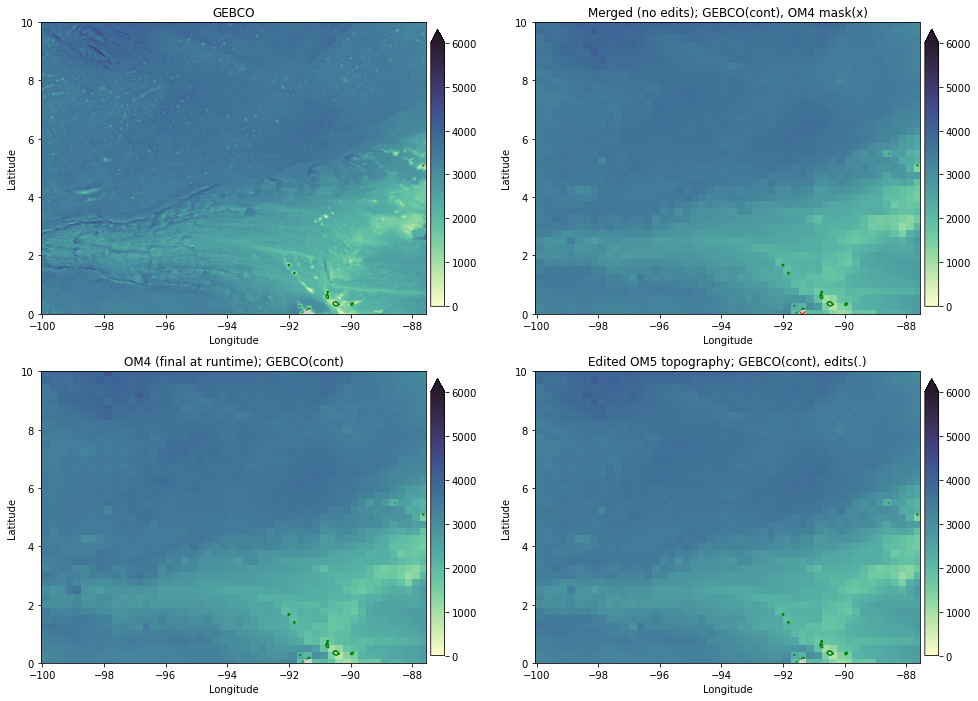

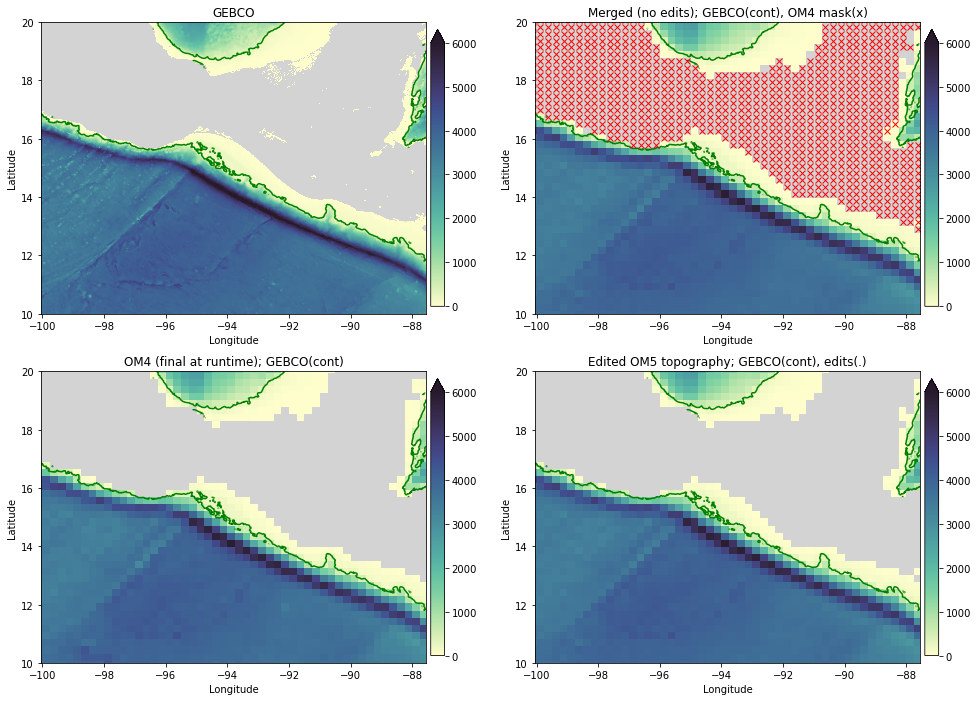

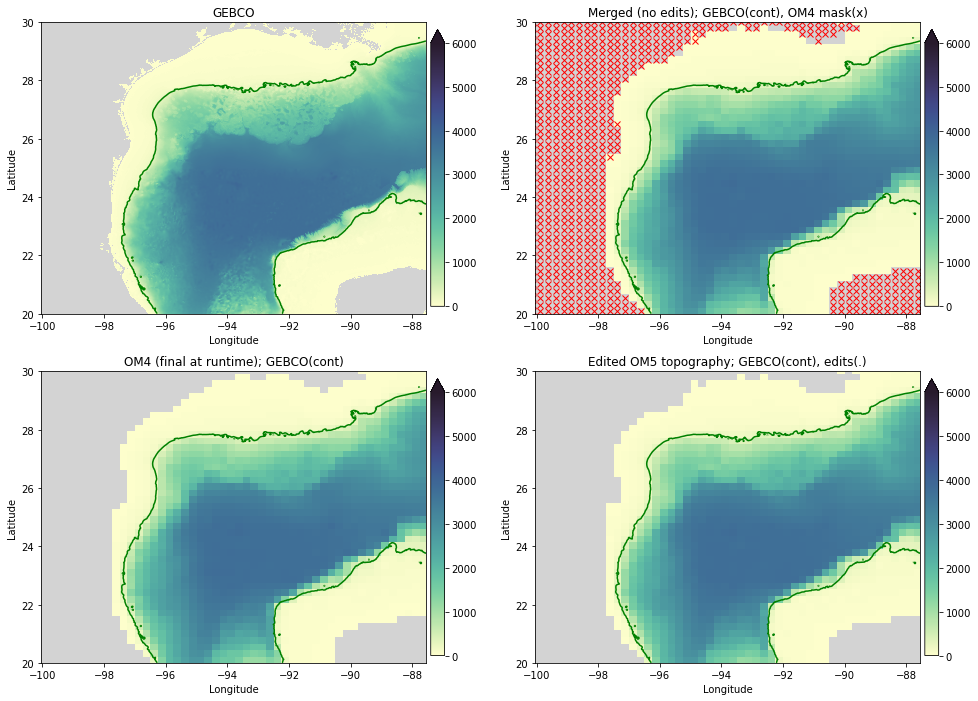

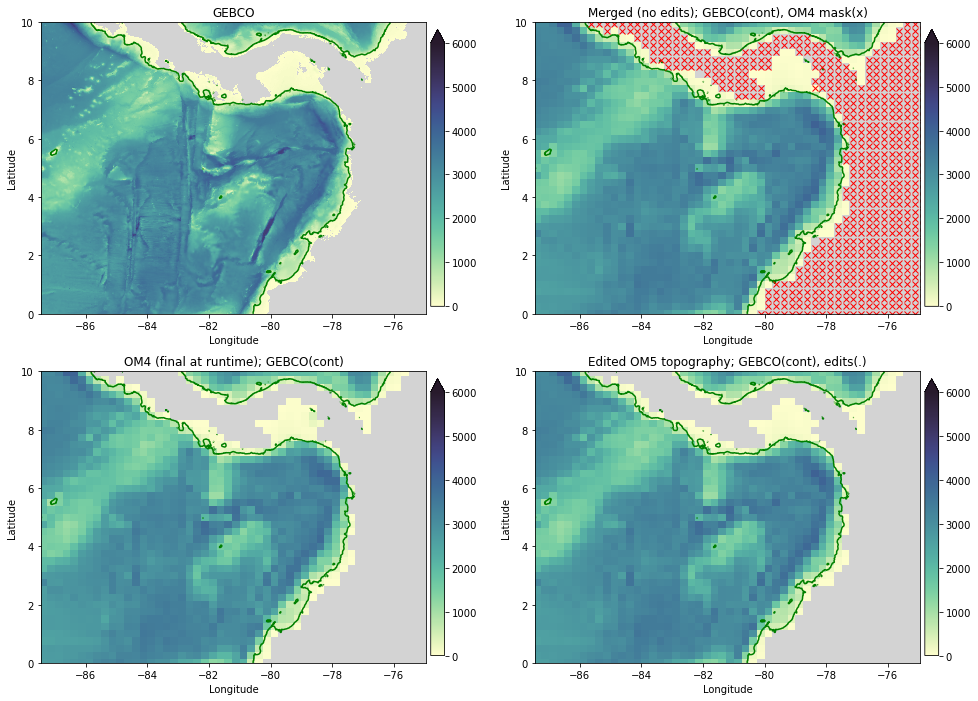

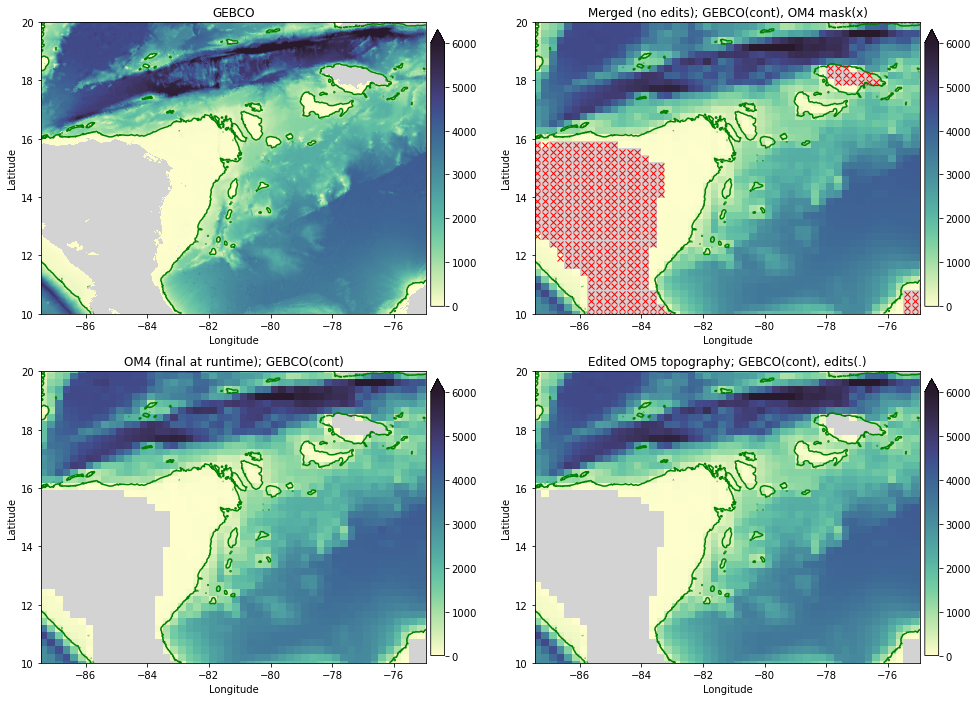

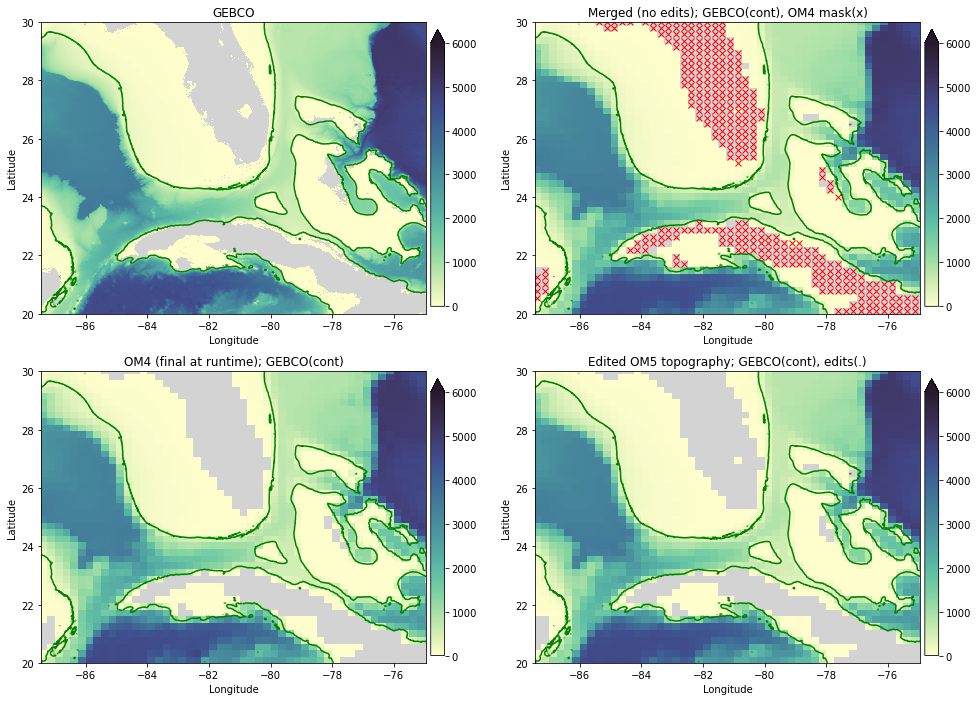

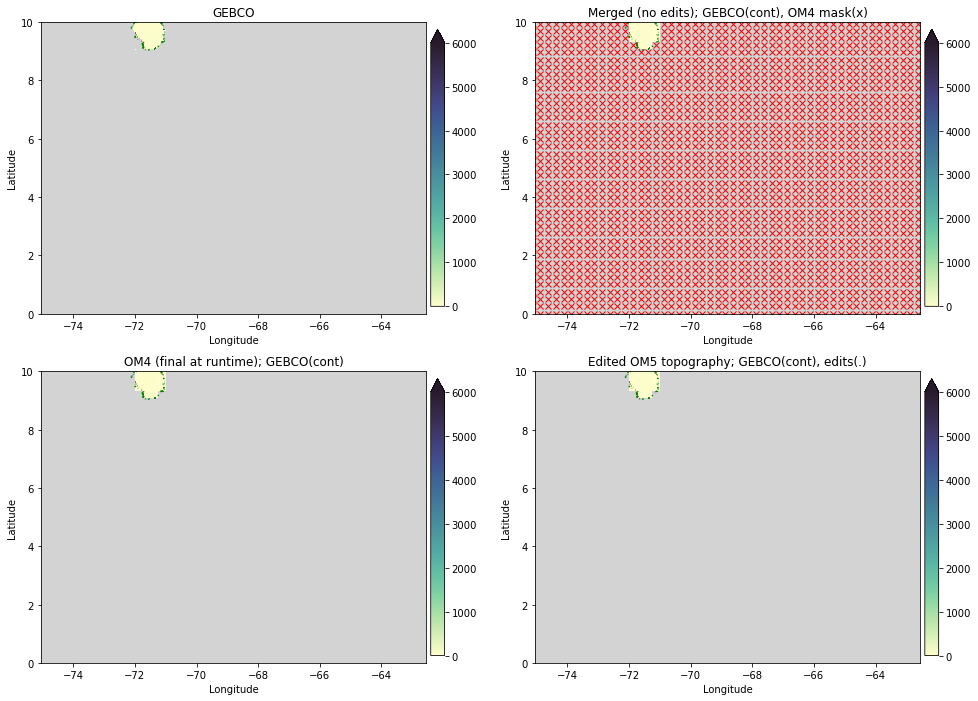

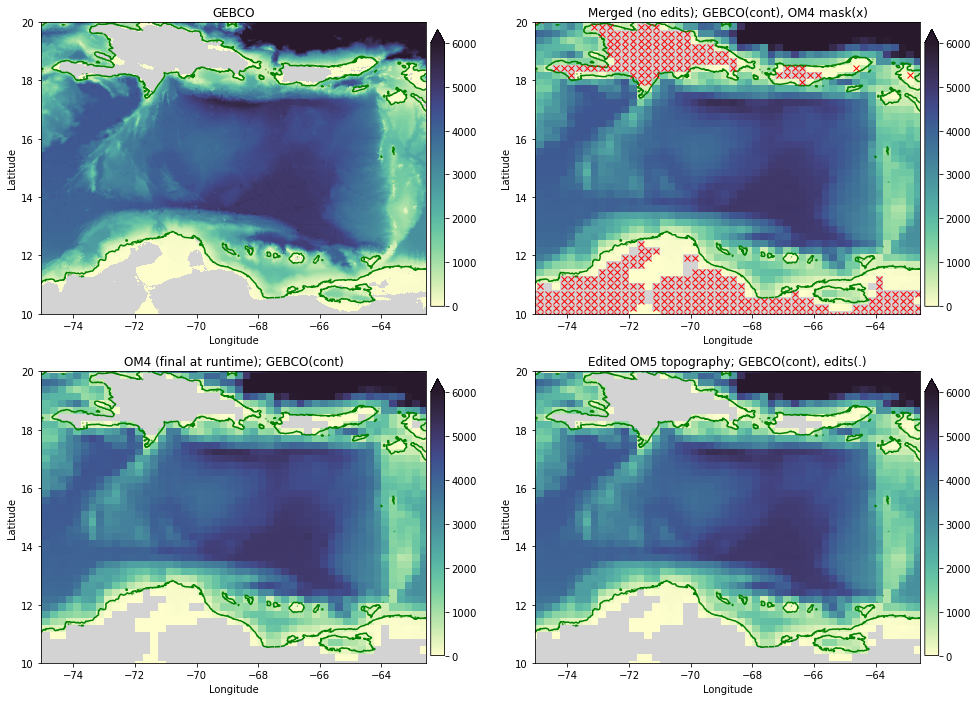

In [8]:
xint = divide_interval(Region_Boundaries[2],Region_Boundaries[3],4)
yint = divide_interval(Region_Boundaries[0],Region_Boundaries[1],3)

depths = [6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]

count = 0
for nx,xrng in enumerate(xint):
    for ny, yrng in enumerate(yint):
        print(xrng)
        try:
            region = Region(xrng[0], yrng[0], width_lon=xrng[1], width_lat=yrng[1])
            map_region(region, 0, depths[count], GEBCO, OM4, OM5, '', gebco_contours=[250],text_depths=False)
            count+=1
        except:
            pass

Gebco (js:je,is:ie) = 23879:24359,54599:55079
OM4 model (js:je,is:ie) = 540:550,908:918
OM5 model (js:je,is:ie) = 621:631,908:918
Using xlim = (-72.5, -70.5) ylim = (9.5, 11.5)


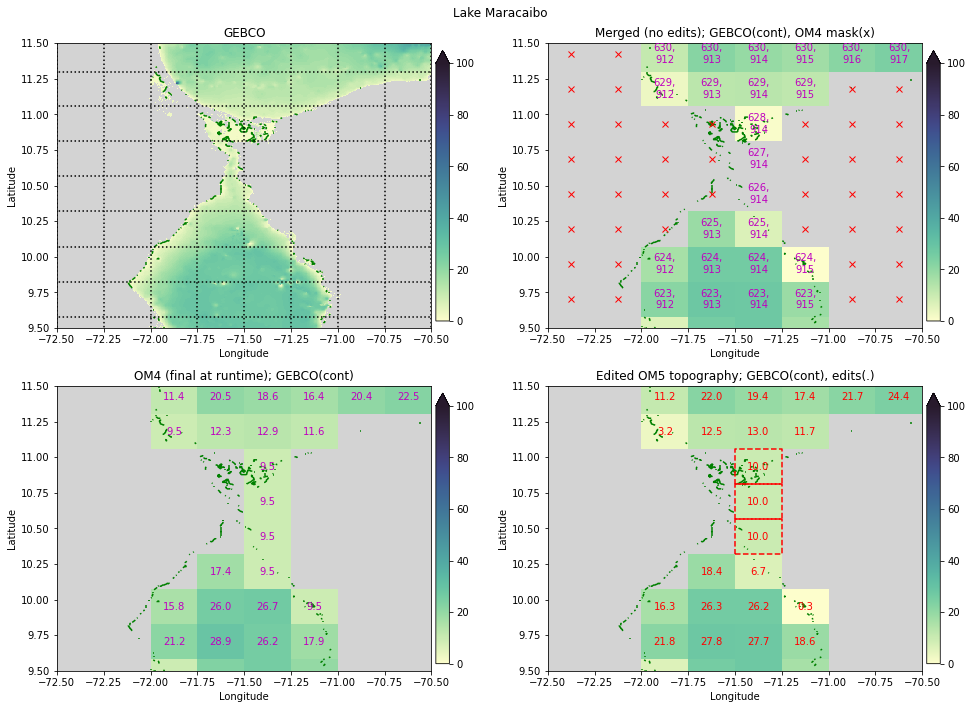

In [9]:
# Open Lake Maracaibo

region = Region(-71.5, 10.5, width_lon=2, width_lat=2.0)

OM5.reset(region)
OM5.depth[628,914] = 10.0
OM5.depth[627,914] = 10.0
OM5.depth[626,914] = 10.0

map_region(region, 0, 100, GEBCO, OM4, OM5, 'Lake Maracaibo', gebco_contours=[250] )

Gebco (js:je,is:ie) = 24239:24719,55319:56279
OM4 model (js:je,is:ie) = 546:556,920:938
OM5 model (js:je,is:ie) = 627:637,920:938
Using xlim = (-69.5, -65.5) ylim = (11.0, 13.0)


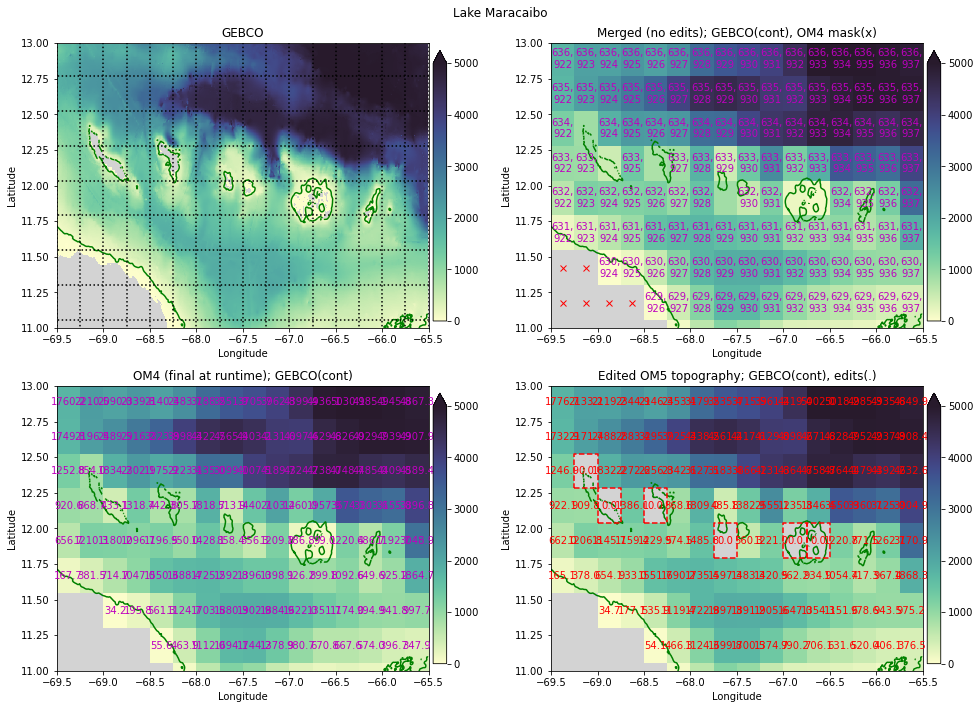

In [29]:
# ABC Islands (Aruba, Curacao, Bonaire)

region = Region(-67.5, 12, width_lon=4, width_lat=2.0)

OM5.reset(region)
OM5.depth[634,923] = 0.0
OM5.depth[633,924] = 0.0
OM5.depth[633,926] = 0.0
OM5.depth[632,929] = 0.0
OM5.depth[632,932] = 0.0
OM5.depth[632,933] = 0.0

map_region(region, 0, 5000, GEBCO, OM4, OM5, 'Lake Maracaibo', gebco_contours=[100] )

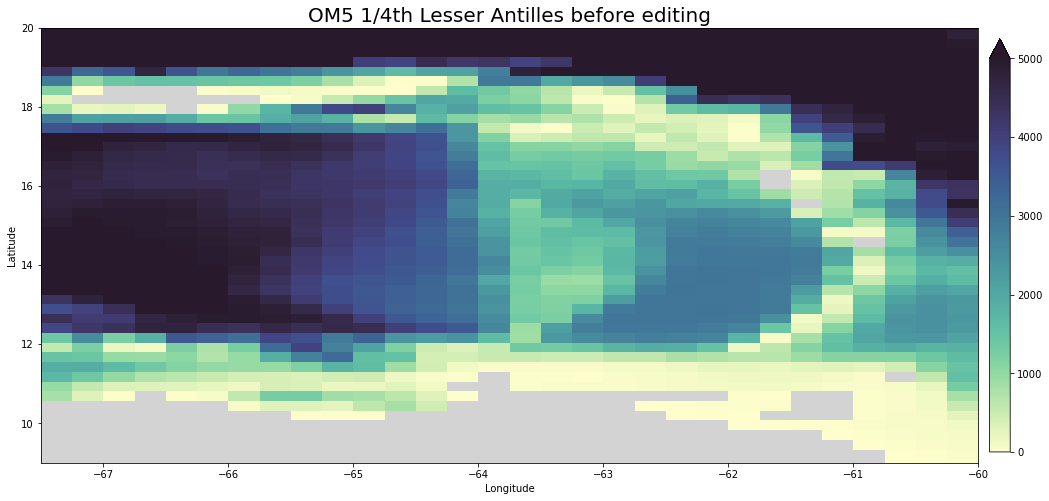

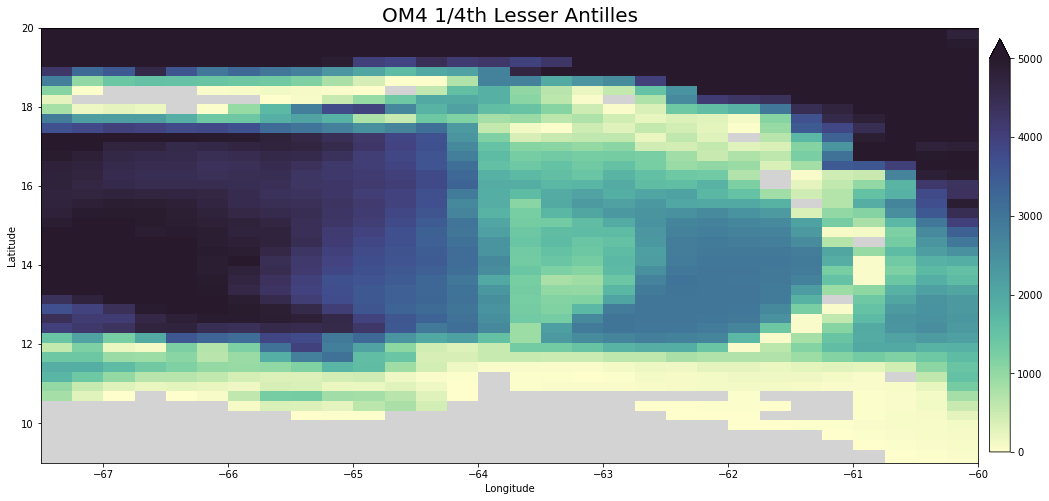

In [11]:
# Broad view of region before edits 

broadview(OM4,OM5,
          (-67.5,-60), (9,20),
          0, 5000, "Lesser Antilles", om4=True, new=False)

Gebco (js:je,is:ie) = 23999:26399,56219:57779
OM4 model (js:je,is:ie) = 542:586,935:963
OM5 model (js:je,is:ie) = 623:667,935:963
Using xlim = (-65.75, -59.25) ylim = (10.0, 20.0)


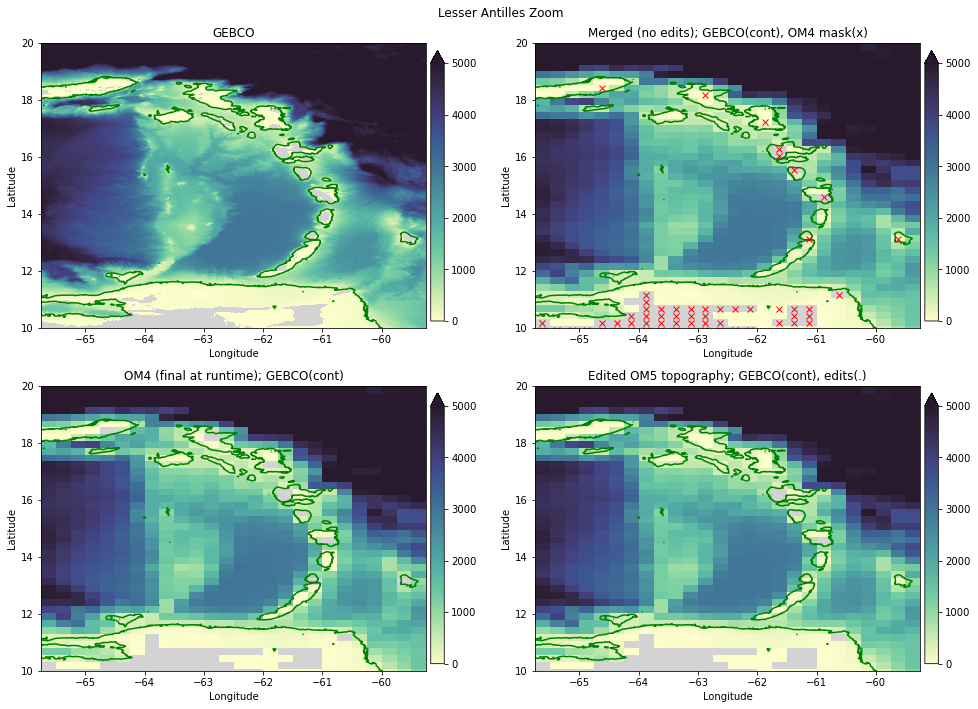

In [12]:
# Lesser Antilles Zoom (before edits)

region = Region(-62.5, 15, width_lon=6.5, width_lat=10.0)
map_region(region, 0, 5000, GEBCO, OM4, OM5, 'Lesser Antilles Zoom', gebco_contours=[250], text_depths=False )

Gebco (js:je,is:ie) = 25704:26184,55727:56447
OM4 model (js:je,is:ie) = 571:582,927:941
OM5 model (js:je,is:ie) = 652:663,927:941
Using xlim = (-67.8, -64.8) ylim = (17.1, 19.1)


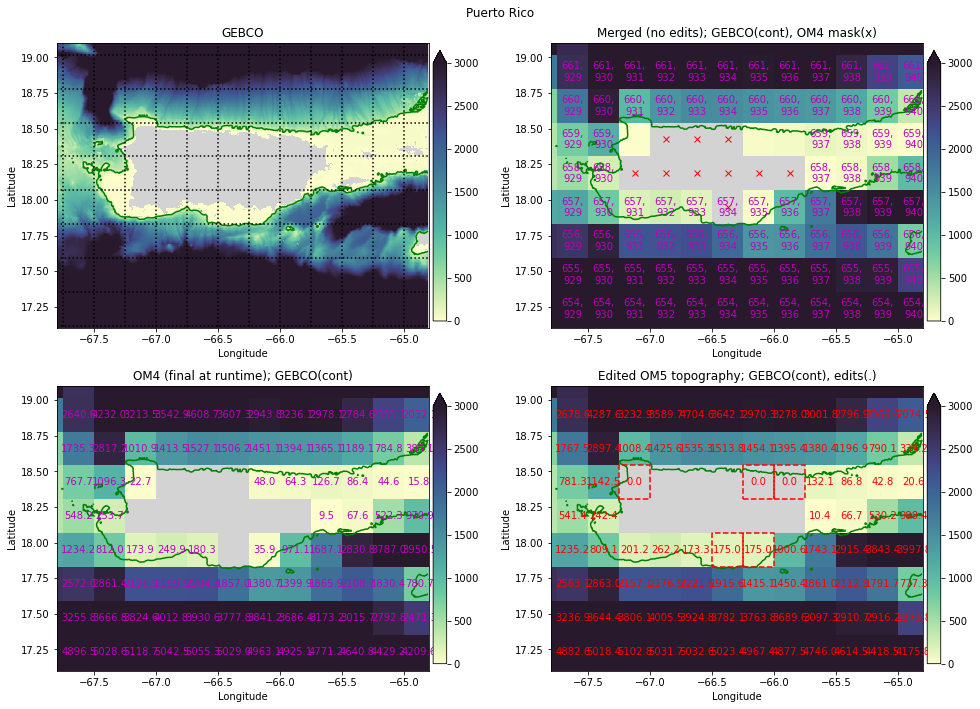

In [13]:
# Check Puerto Rico

region = Region(-66.3, 18.1, width_lon=3, width_lat=2)

#OM5.reset(region)
OM5.depth[659,931] = 0.0
OM5.depth[659,935] = 0.0
OM5.depth[659,936] = 0.0

OM5.depth[657,934] = 175.0
OM5.depth[657,935] = 175.0

map_region(region, 0, 3000, GEBCO, OM4, OM5, 'Puerto Rico', gebco_contours=[250] )

Gebco (js:je,is:ie) = 25655:26135,56279:56759
OM4 model (js:je,is:ie) = 571:581,936:946
OM5 model (js:je,is:ie) = 652:662,936:946
Using xlim = (-65.5, -63.5) ylim = (16.9, 18.9)


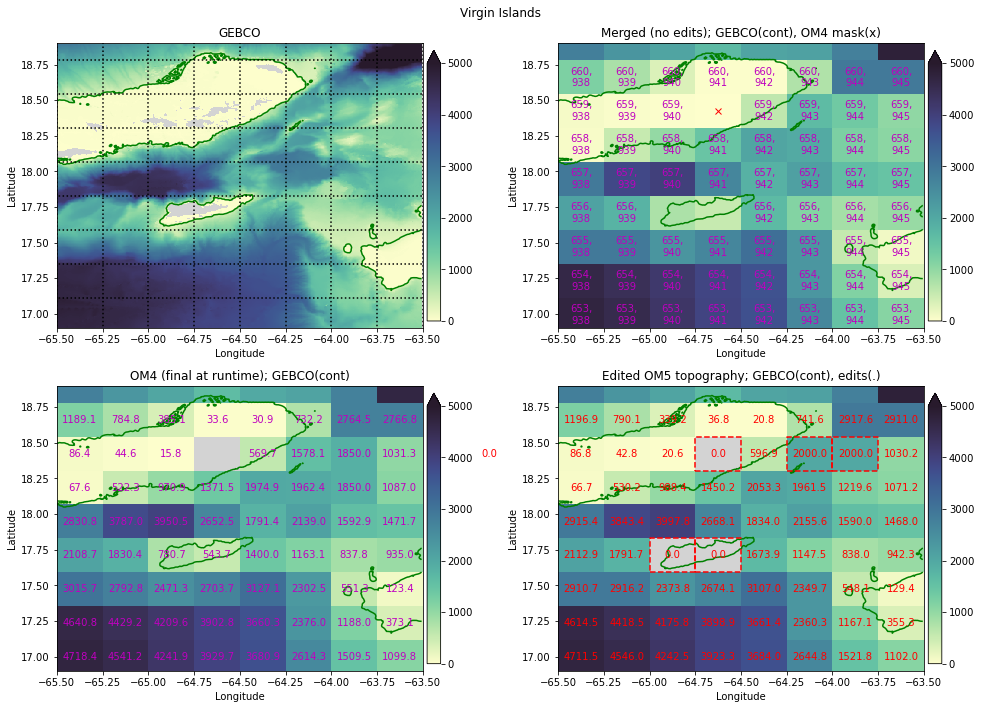

In [35]:
# Check Virgin Islands

region = Region(-64.5, 17.9, width_lon=2, width_lat=2)

#OM5.reset(region)
OM5.depth[659,941] = 0.0
OM5.depth[656,941] = 0.0
OM5.depth[656,940] = 0.0
OM5.depth[659,944] = 2000.0
OM5.depth[659,943] = 2000.0

map_region(region, 0, 5000, GEBCO, OM4, OM5, 'Virgin Islands', gebco_contours=[250] )

Gebco (js:je,is:ie) = 25679:26159,56664:57144
OM4 model (js:je,is:ie) = 571:581,943:953
OM5 model (js:je,is:ie) = 652:662,943:953
Using xlim = (-63.9, -61.9) ylim = (17.0, 19.0)


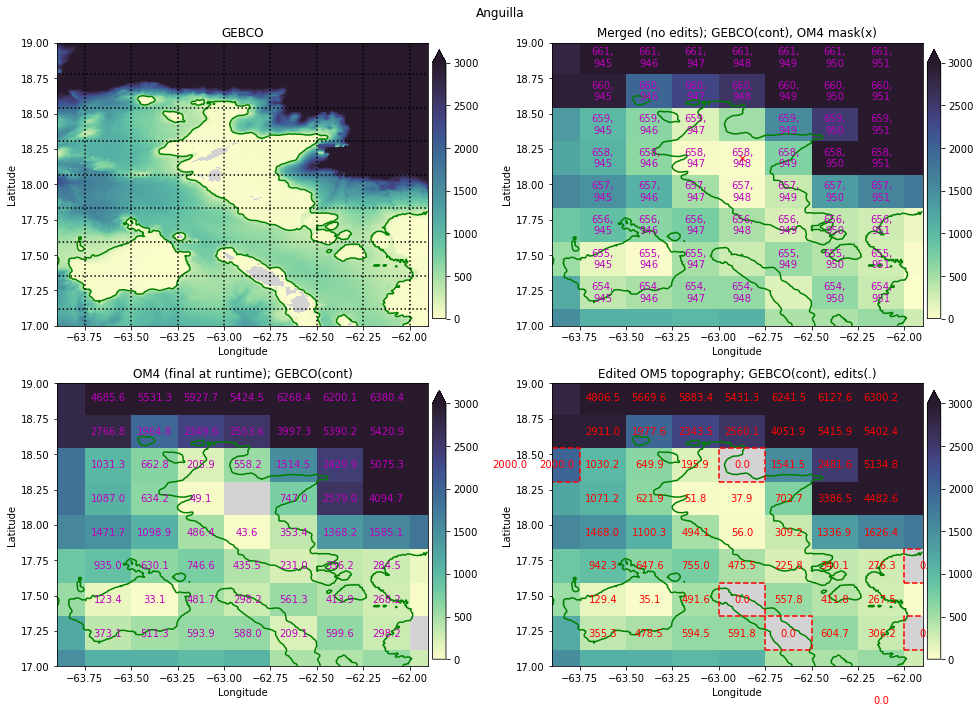

In [36]:
# Check Anguilla 

region = Region(-62.9, 18.0, width_lon=2, width_lat=2)

#OM5.reset(region)
OM5.depth[659,948] = 0.0
OM5.depth[655,948] = 0.0
OM5.depth[654,949] = 0.0

map_region(region, 0, 3000, GEBCO, OM4, OM5, 'Anguilla', gebco_contours=[250] )

Gebco (js:je,is:ie) = 25392:25872,56904:57384
OM4 model (js:je,is:ie) = 566:576,947:957
OM5 model (js:je,is:ie) = 647:657,947:957
Using xlim = (-62.9, -60.9) ylim = (15.8, 17.8)


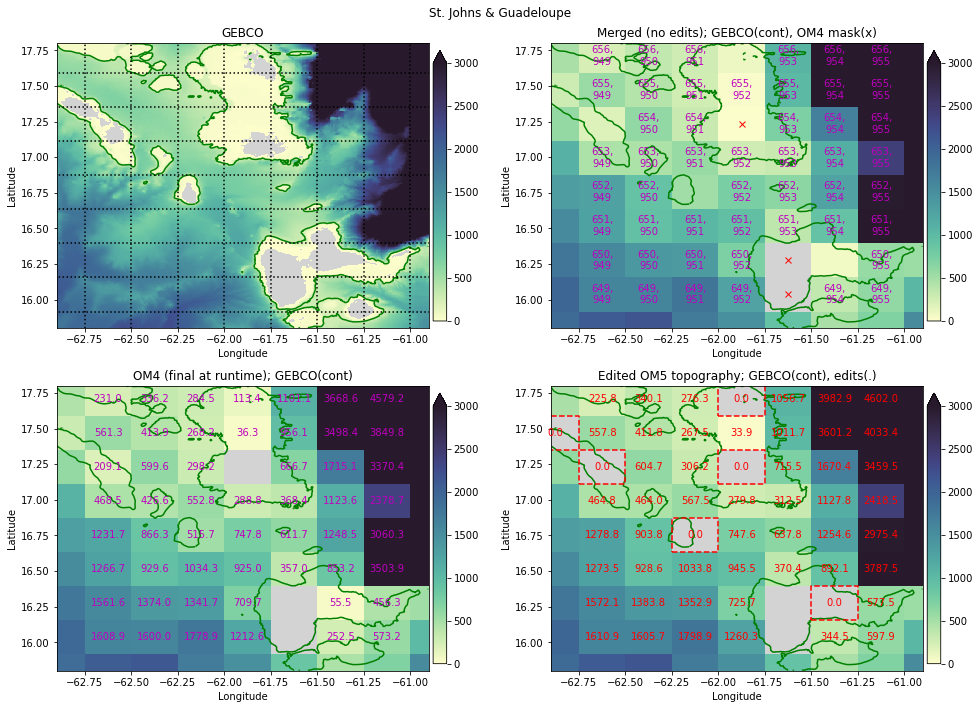

In [16]:
# Check St. Johns & Guadeloupe

region = Region(-61.9, 16.8, width_lon=2, width_lat=2)

#OM5.reset(region)
OM5.depth[654,952] = 0.0
OM5.depth[656,952] = 0.0
OM5.depth[650,954] = 0.0
OM5.depth[652,951] = 0.0

map_region(region, 0, 3000, GEBCO, OM4, OM5, 'St. Johns & Guadeloupe', gebco_contours=[250] )

Gebco (js:je,is:ie) = 25007:25487,57047:57527
OM4 model (js:je,is:ie) = 559:570,949:959
OM5 model (js:je,is:ie) = 640:651,949:959
Using xlim = (-62.3, -60.3) ylim = (14.2, 16.2)


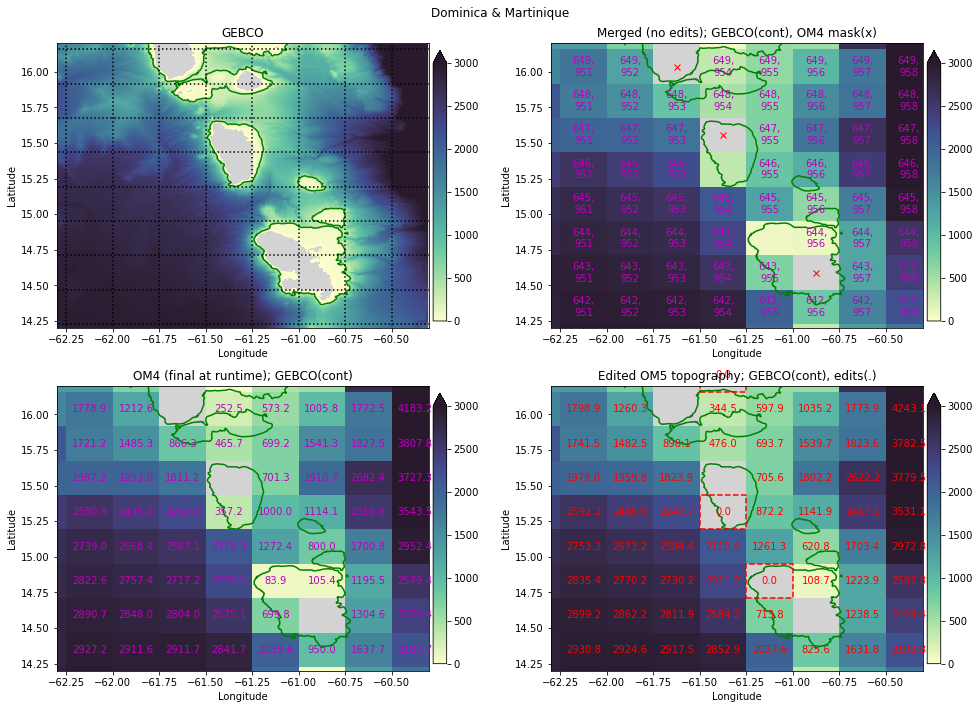

In [17]:
# Check Dominica & Martinique

region = Region(-61.3, 15.2, width_lon=2, width_lat=2)

#OM5.reset(region)
OM5.depth[644,955] = 0.0
OM5.depth[646,954] = 0.0
OM5.depth[650,954] = 0.0
OM5.depth[652,951] = 0.0

map_region(region, 0, 3000, GEBCO, OM4, OM5, 'Dominica & Martinique', gebco_contours=[250] )

Gebco (js:je,is:ie) = 24624:25104,57144:57624
OM4 model (js:je,is:ie) = 553:563,951:961
OM5 model (js:je,is:ie) = 634:644,951:961
Using xlim = (-61.9, -59.9) ylim = (12.6, 14.6)


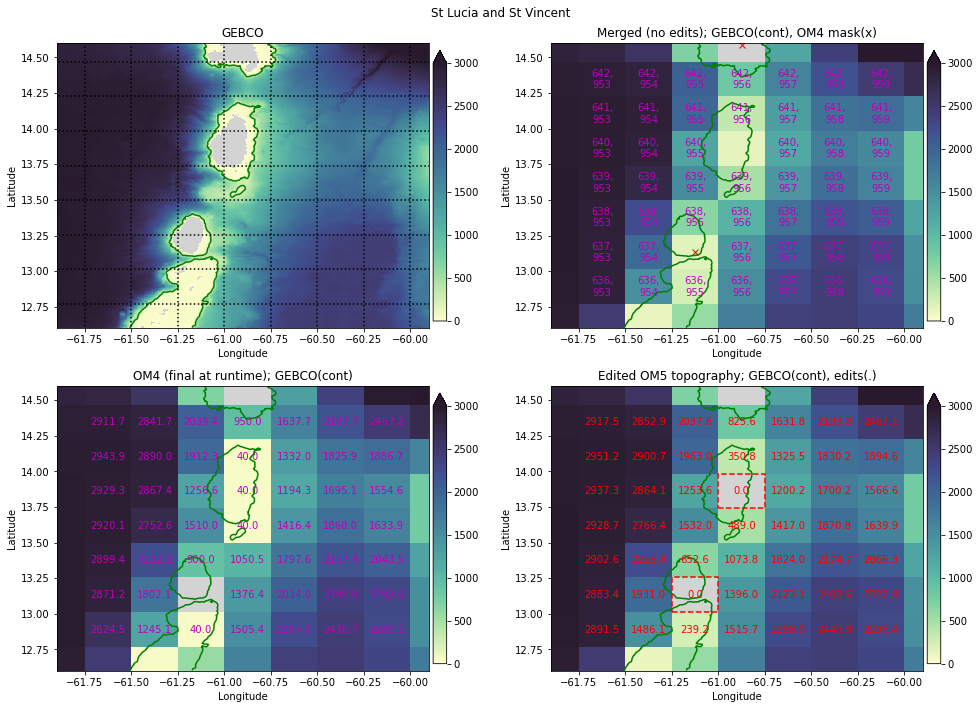

In [40]:
# Check St Lucia and St Vincent

region = Region(-60.9, 13.6, width_lon=2, width_lat=2)

#OM5.reset(region)
OM5.depth[640,956] = 0.0
OM5.depth[637,955] = 0.0

map_region(region, 0, 3000, GEBCO, OM4, OM5, 'St Lucia and St Vincent', gebco_contours=[250] )

Gebco (js:je,is:ie) = 24287:24767,56975:57455
OM4 model (js:je,is:ie) = 547:557,948:958
OM5 model (js:je,is:ie) = 628:638,948:958
Using xlim = (-62.6, -60.6) ylim = (11.2, 13.2)


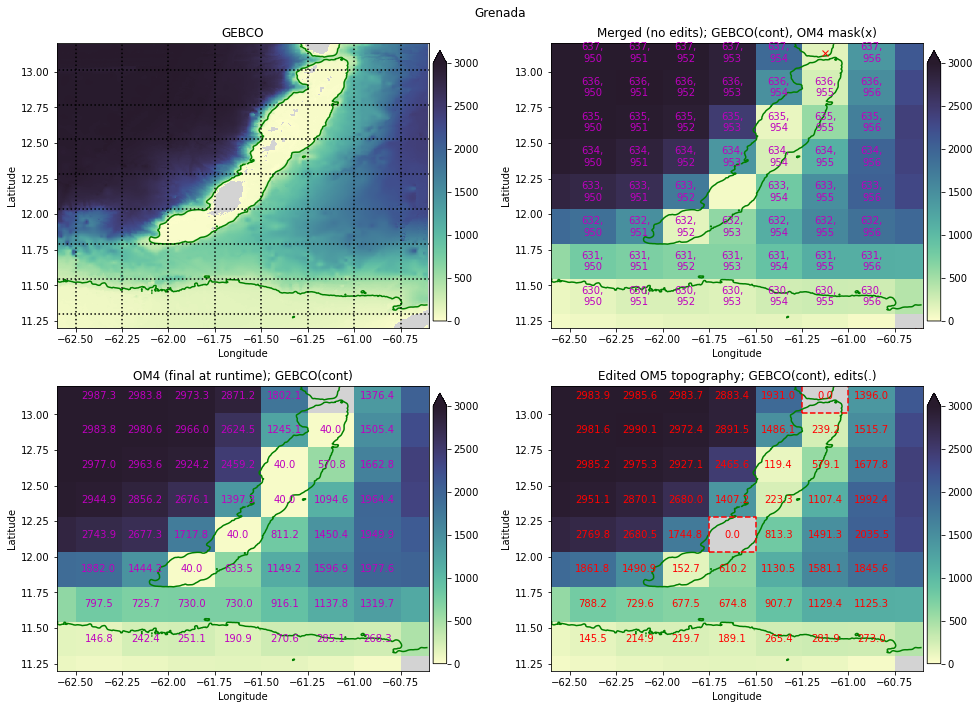

In [19]:
# Check Grenada

region = Region(-61.6, 12.2, width_lon=2, width_lat=2)

#OM5.reset(region)
OM5.depth[633,953] = 0.0

map_region(region, 0, 3000, GEBCO, OM4, OM5, 'Grenada', gebco_contours=[250] )

Gebco (js:je,is:ie) = 23736:24696,56855:57815
OM4 model (js:je,is:ie) = 538:556,946:964
OM5 model (js:je,is:ie) = 619:637,946:964
Using xlim = (-63.1, -59.1) ylim = (8.9, 12.9)


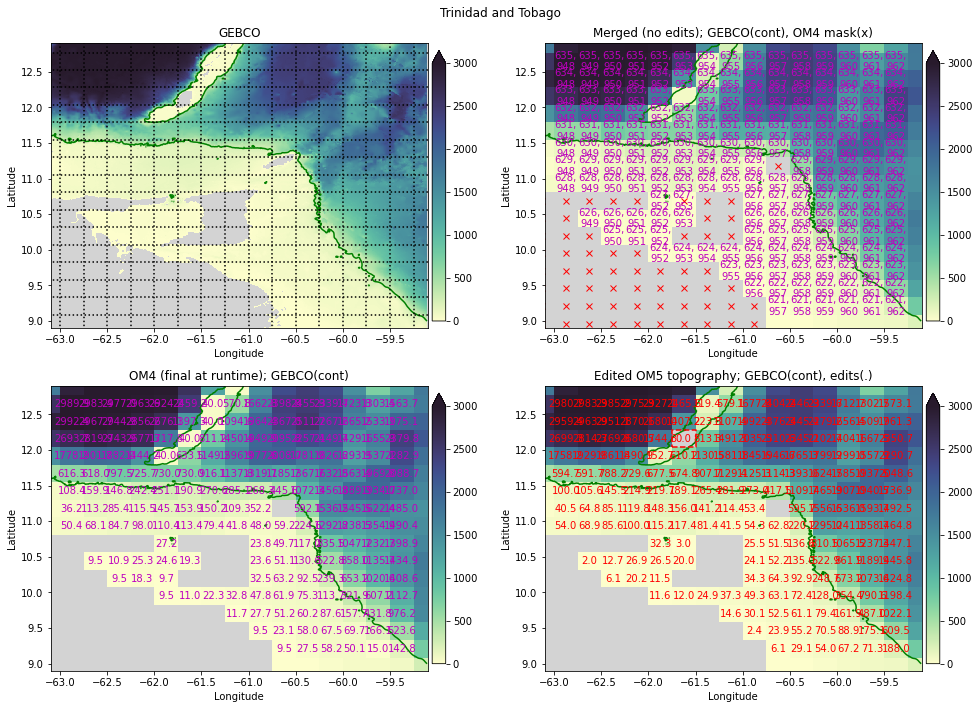

In [20]:
# Check Trinidad and Tobago

region = Region(-61.1, 10.9, width_lon=4, width_lat=4)
map_region(region, 0, 3000, GEBCO, OM4, OM5, 'Trinidad and Tobago', gebco_contours=[250] )

Gebco (js:je,is:ie) = 24456:24936,57455:57935
OM4 model (js:je,is:ie) = 550:560,956:966
OM5 model (js:je,is:ie) = 631:641,956:966
Using xlim = (-60.6, -58.6) ylim = (11.9, 13.9)


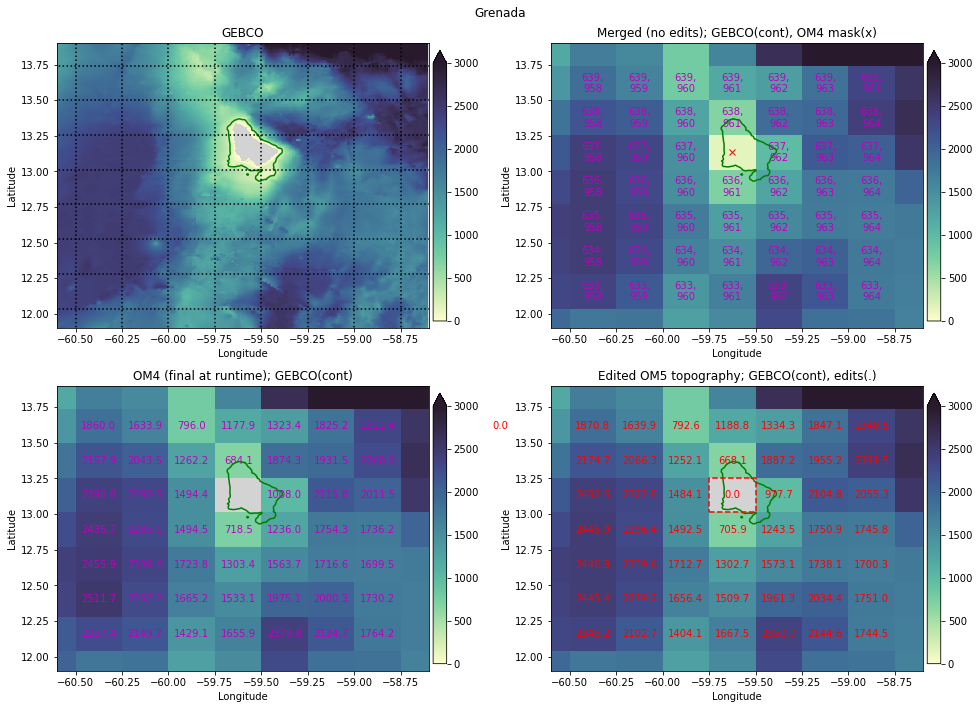

In [21]:
# Check Barbados

region = Region(-59.6, 12.9, width_lon=2, width_lat=2)

#OM5.reset(region)
OM5.depth[637,961] = 0.0

map_region(region, 0, 3000, GEBCO, OM4, OM5, 'Grenada', gebco_contours=[250] )

Gebco (js:je,is:ie) = 23999:26399,56219:57779
OM4 model (js:je,is:ie) = 542:586,935:963
OM5 model (js:je,is:ie) = 623:667,935:963
Using xlim = (-65.75, -59.25) ylim = (10.0, 20.0)


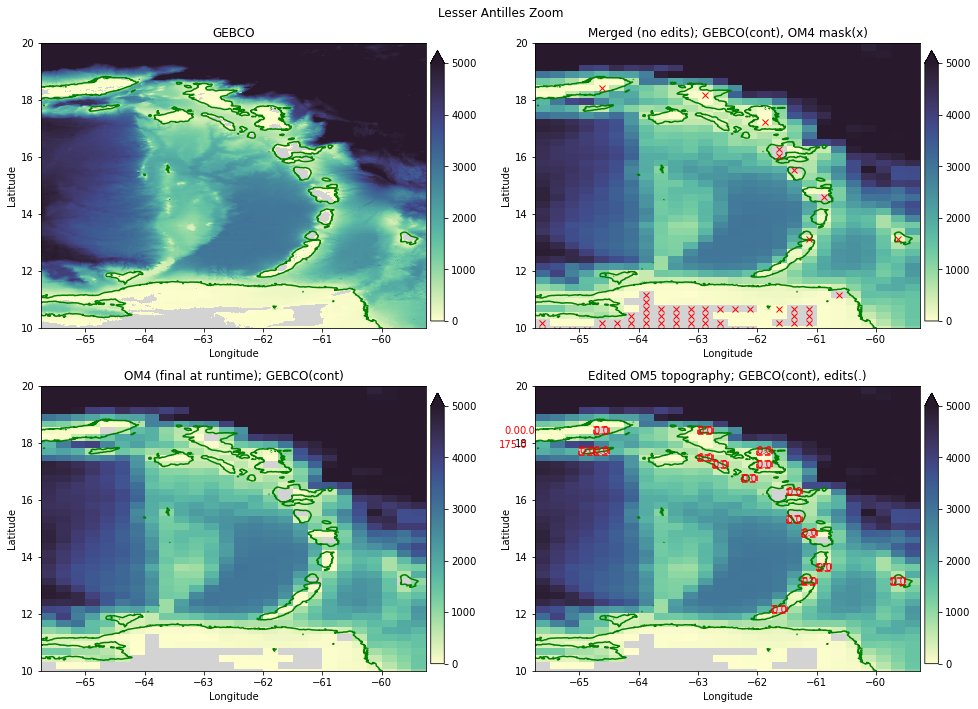

In [22]:
# Lesser Antilles Zoom (after edits)

region = Region(-62.5, 15, width_lon=6.5, width_lat=10.0)
map_region(region, 0, 5000, GEBCO, OM4, OM5, 'Lesser Antilles Zoom', gebco_contours=[250], text_depths=False )

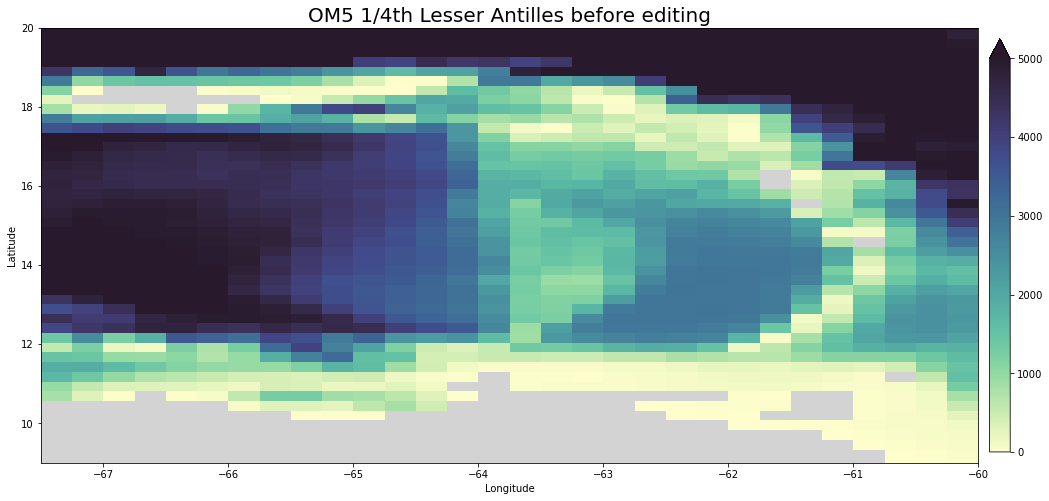

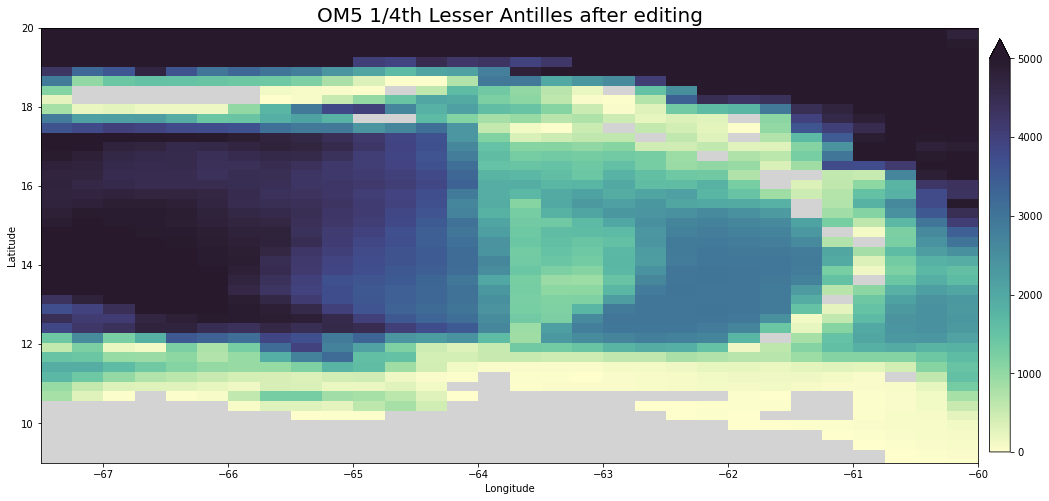

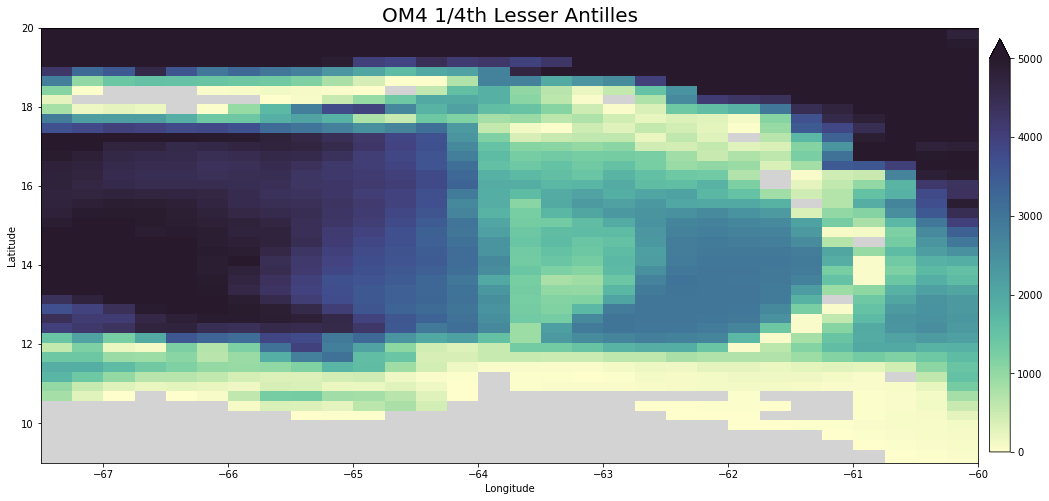

In [23]:
# Broad view of region before edits 

broadview(OM4,OM5,
          (-67.5,-60), (9,20),
          0, 5000, "Lesser Antilles", om4=True, new=True)

In [24]:
OM5.write_nc("om5_topo_edits_region_15.nc")

New Depth at jEdit=626 iEdit=914 set to 10.0
New Depth at jEdit=627 iEdit=914 set to 10.0
New Depth at jEdit=628 iEdit=914 set to 10.0
New Depth at jEdit=632 iEdit=929 set to 0.0
New Depth at jEdit=633 iEdit=924 set to 0.0
New Depth at jEdit=633 iEdit=926 set to 0.0
New Depth at jEdit=633 iEdit=953 set to 0.0
New Depth at jEdit=634 iEdit=923 set to 0.0
New Depth at jEdit=637 iEdit=955 set to 0.0
New Depth at jEdit=637 iEdit=961 set to 0.0
New Depth at jEdit=639 iEdit=956 set to 0.0
New Depth at jEdit=644 iEdit=955 set to 0.0
New Depth at jEdit=646 iEdit=954 set to 0.0
New Depth at jEdit=650 iEdit=954 set to 0.0
New Depth at jEdit=652 iEdit=951 set to 0.0
New Depth at jEdit=654 iEdit=949 set to 0.0
New Depth at jEdit=654 iEdit=952 set to 0.0
New Depth at jEdit=655 iEdit=948 set to 0.0
New Depth at jEdit=656 iEdit=940 set to 0.0
New Depth at jEdit=656 iEdit=941 set to 0.0
New Depth at jEdit=656 iEdit=952 set to 0.0
New Depth at jEdit=657 iEdit=934 set to 175.0
New Depth at jEdit=657 iEdi